In [3]:
import pandas as pd

In [2]:
Sig_Eqs = pd.read_csv('earthquakes-2024-11-02_22-13-51_+0800.tsv', sep='\t')

In [40]:
Sig_Eqs['Country'] = Sig_Eqs['Location Name'].astype(str).apply(lambda x: x.split(':')[0].strip())#国家和地名在文件中混合需要单独提取
country_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum()
top_countries = country_deaths.sort_values(ascending=False).head(20)
print(top_countries)

Country
CHINA           2075947.0
TURKEY          1148745.0
IRAN             995410.0
ITALY            498418.0
SYRIA            369224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            278607.0
ARMENIA          191890.0
ISRAEL           160120.0
PAKISTAN         145080.0
ECUADOR          135496.0
IRAQ             120200.0
TURKMENISTAN     117412.0
PERU             101461.0
PORTUGAL          83547.0
GREECE            80482.0
CHILE             64270.0
INDIA             61960.0
TAIWAN            57152.0
Name: Deaths, dtype: float64


In [9]:
import matplotlib.pyplot as plt

In [10]:
Sig_Eqs_3plus= Sig_Eqs[Sig_Eqs['Mag'] > 3.0]

In [11]:
per_year_counts = Sig_Eqs_3plus['Year'].value_counts().sort_index()

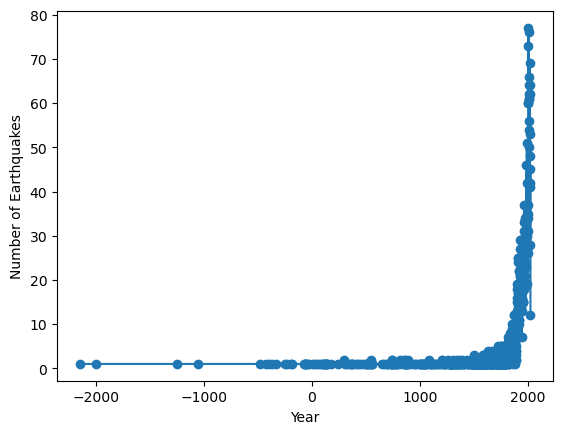

In [12]:
plt.plot(per_year_counts.index,per_year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

In [94]:
def CountEq_LargestEq(country):
    country_eqs = Sig_Eqs[Sig_Eqs['Country'] == country]
    total_eqs = len(country_eqs)
    # 数据中存在很多空值影响运行
    if total_eqs == 0:
        return 0, None, None    
    if country_eqs['Mag'].dropna().empty:
        return total_eqs, None, None 
    max_index = country_eqs['Mag'].dropna().idxmax()
    largest_eq = country_eqs.loc[max_index]   
    return total_eqs, largest_eq['Year'], largest_eq['Location Name']

In [98]:
results = []
for country in Sig_Eqs['Country'].unique():
    result = CountEq_LargestEq(country)
    results.append(result)
results_df = pd.DataFrame(results, columns=['Total Earthquakes', 'Year', 'Location'])
results_df = results_df.sort_values(by='Total Earthquakes', ascending=False)
print(results_df.head())

    Total Earthquakes    Year                                     Location
17                623  1668.0                    CHINA:  SHANDONG PROVINCE
86                395  2004.0  INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST
9                 386   856.0                        IRAN:  DAMGHAN, QUMIS
38                359  2011.0                               JAPAN:  HONSHU
6                 332  1915.0           ITALY:  MARSICA, AVEZZANO, ABRUZZI


C:\Users\胡天龙\AppData\Local\Temp\ipykernel_32964\1168379827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])
C:\Users\胡天龙\AppData\Local\Temp\ipykernel_32964\1168379827.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YearMonth'] = df_filtered['DATE'].dt.to_period('M')


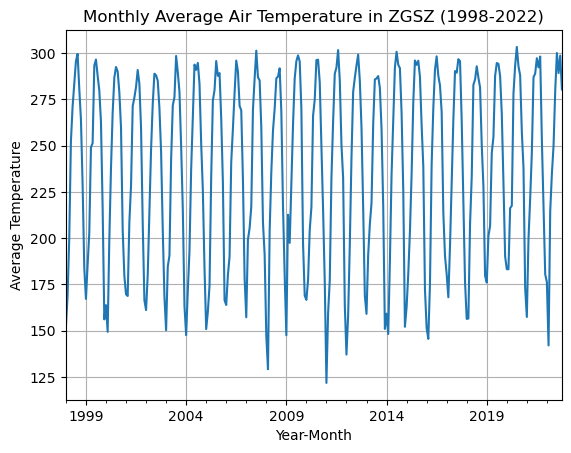

In [159]:
import matplotlib.pyplot as plt
df = pd.read_csv('Baoan_Weather_1998_2022.csv',low_memory=False)
#文件中tmp和DOM在同一列需要先进行分离
df[['Temperature', 'DOM']] = df['TMP'].str.split(',', expand=True)
df['Temperature'] = df['Temperature'].str.strip()
#print(df[['TMP', 'Temperature', 'DOM']])检验前部分时候用到
#print(df['Temperature'].dtype)这时的temperaturetype为object
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['DOM'] = pd.to_numeric(df['DOM'], errors='coerce')
df_filtered = df[df['DOM'].isin([1, 5])]
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])
df_filtered['YearMonth'] = df_filtered['DATE'].dt.to_period('M')
monthly_avg_temp = df_filtered.groupby('YearMonth')['Temperature'].mean()
monthly_avg_temp.plot()
plt.title('Monthly Average Air Temperature in ZGSZ (1998-2022)')
plt.xlabel('Year-Month')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [4]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

C:\Users\胡天龙\AppData\Local\Temp\ipykernel_3992\999482468.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [21]:
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')#wom_wind格式为object需要改变
top_10_hurricanes = df.groupby('SID').apply(lambda x: x.nlargest(10, 'WMO_WIND')).reset_index(drop=True)
top_10_hurricanes = top_10_hurricanes.dropna(subset=['NAME', 'WMO_WIND'])
print(top_10_hurricanes[['SID', 'NAME', 'WMO_WIND']])

                  SID    NAME  WMO_WIND
52567   1950224N15216    HIKI      75.0
52568   1950224N15216    HIKI      75.0
52569   1950224N15216    HIKI      75.0
52570   1950224N15216    HIKI      75.0
52571   1950224N15216    HIKI      75.0
...               ...     ...       ...
133490  2021311N13248  SANDRA      30.0
133491  2021311N13248  SANDRA      30.0
133492  2021311N13248  SANDRA      30.0
133493  2021311N13248  SANDRA      25.0
133494  2021311N13248  SANDRA      25.0

[39423 rows x 3 columns]


C:\Users\胡天龙\AppData\Local\Temp\ipykernel_3992\1338050228.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_hurricanes = df.groupby('SID').apply(lambda x: x.nlargest(10, 'WMO_WIND')).reset_index(drop=True)


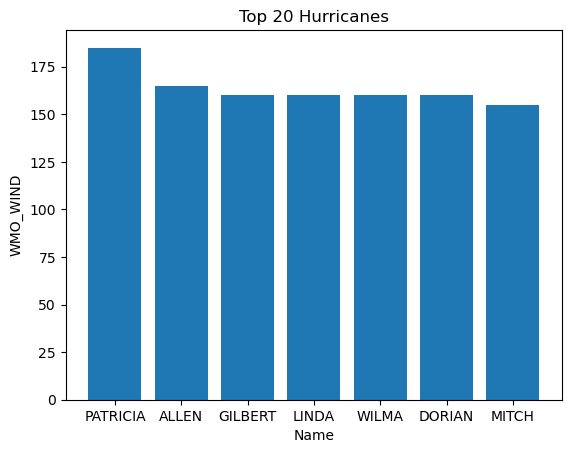

In [19]:
import matplotlib.pyplot as plt
top_20_hurricanes = df.nlargest(20, 'WMO_WIND')[['NAME', 'WMO_WIND']]
top_20_hurricanes = top_20_hurricanes.dropna(subset=['NAME', 'WMO_WIND'])
top_20_hurricanes['NAME'] = top_20_hurricanes['NAME'].astype(str)
plt.bar(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'])
plt.xlabel('Name')
plt.ylabel('WMO_WIND')
plt.title('Top 20 Hurricanes')
plt.show()

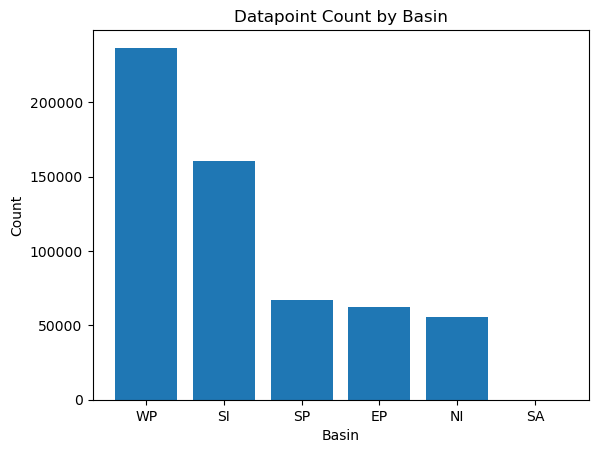

In [23]:
basin_counts = df['BASIN'].value_counts()
plt.bar(basin_counts.index, basin_counts.values)
plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Datapoint Count by Basin')
plt.show()

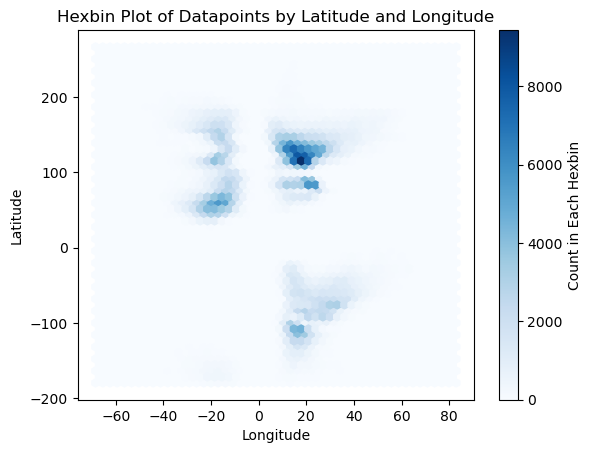

In [27]:
plt.hexbin(df['LAT'], df['LON'], gridsize=50, cmap='Blues')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Datapoints by Latitude and Longitude')
plt.colorbar(label='Count in Each Hexbin')
plt.show()

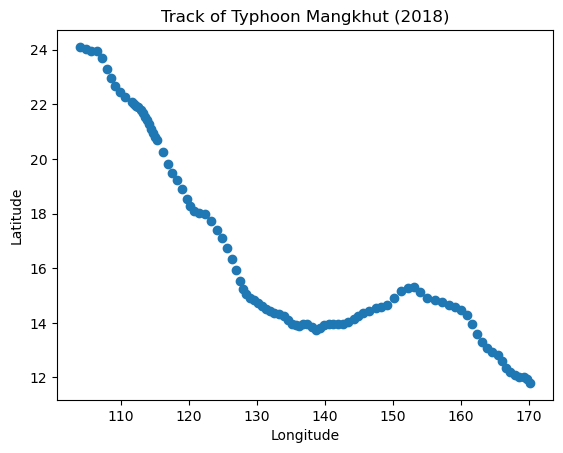

In [31]:
mangkan = df[(df['SEASON'] == 2018) & (df['NAME'] == 'MANGKHUT')]
plt.scatter(mangkan['LON'], mangkan['LAT'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.show()

In [37]:
filtered_df = df[(df['BASIN'].isin(['WP', 'EP'])) & (df['SEASON'] >= 1970)]
print(filtered_df)

                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   
...               ...     ...     ...   ...      ...    ...   
707084  2022275N10316    2022      76    EP       MM  JULIA   
707085  2022275N10316    2022      76    EP       MM  JULIA   
707173  2022286N15151    2022      80    WP       MM    NaN   
707174  2022286N15151    2022      80    WP       MM    NaN   
707175  2022286N15151    2022      80    WP       MM    NaN   

                  ISO_TIME NATURE       LAT      LON  WMO_WIND WMO_PRES  \
350393 1970-02-19 00:00:00     TS   7.00000  151.400       NaN     1006   
350394 1970-02-19 03:00:00     TS   7.24752  151.205       NaN            
350395 1970-02-19 

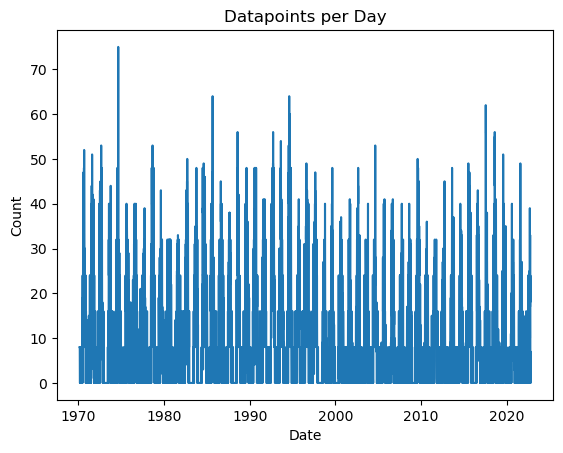

In [39]:
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Datapoints per Day')
plt.show()

In [45]:
climatology = filtered_df.resample('D', on='ISO_TIME').size().resample('YE').mean()
print(climatology)

ISO_TIME
1970-12-31    11.250000
1971-12-31    12.216438
1972-12-31    10.797814
1973-12-31     6.594521
1974-12-31     9.810959
1975-12-31     7.358904
1976-12-31     9.128415
1977-12-31     6.687671
1978-12-31    11.295890
1979-12-31     8.764384
1980-12-31     8.221311
1981-12-31     8.427397
1982-12-31    10.797260
1983-12-31     8.849315
1984-12-31    10.224044
1985-12-31    11.723288
1986-12-31    11.331507
1987-12-31     8.813699
1988-12-31     8.863388
1989-12-31    10.898630
1990-12-31    12.224658
1991-12-31    10.835616
1992-12-31    13.666667
1993-12-31    11.345205
1994-12-31    13.567123
1995-12-31     8.673973
1996-12-31    11.562842
1997-12-31    12.482192
1998-12-31     6.320548
1999-12-31     6.726027
2000-12-31     8.073770
2001-12-31     7.912329
2002-12-31     8.482192
2003-12-31     7.841096
2004-12-31     9.426230
2005-12-31     7.279452
2006-12-31     8.517808
2007-12-31     6.589041
2008-12-31     7.210383
2009-12-31     9.490411
2010-12-31     4.580822
2011-12

In [49]:
daily_anomaly = filtered_df.resample('D', on='ISO_TIME').size() - climatology
print(daily_anomaly)

ISO_TIME
1970-02-19   NaN
1970-02-20   NaN
1970-02-21   NaN
1970-02-22   NaN
1970-02-23   NaN
              ..
2022-10-09   NaN
2022-10-10   NaN
2022-10-11   NaN
2022-10-12   NaN
2022-12-31   NaN
Length: 19230, dtype: float64


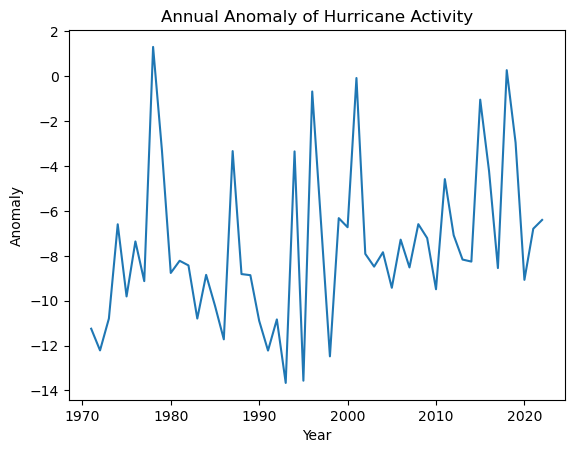

In [53]:
annual_anomaly = daily_anomaly.resample('YE').mean()
plt.plot(annual_anomaly.index, annual_anomaly.values)
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Annual Anomaly of Hurricane Activity')
plt.show()

In [55]:
import pandas as pd
df = pd.read_csv('USW00014607.csv')
print(df.head())

C:\Users\胡天龙\AppData\Local\Temp\ipykernel_3992\4186287511.py:2: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,101,107,109,111,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('USW00014607.csv')


       STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00014607  1939-01-16  46.87049  -68.01723      188.6   
1  USW00014607  1939-01-17  46.87049  -68.01723      188.6   
2  USW00014607  1939-01-18  46.87049  -68.01723      188.6   
3  USW00014607  1939-01-19  46.87049  -68.01723      188.6   
4  USW00014607  1939-01-20  46.87049  -68.01723      188.6   

                                     NAME  PRCP PRCP_ATTRIBUTES  SNOW  \
0  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0            ,,0,   NaN   
1  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0           T,,0,   NaN   
2  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0           T,,0,   NaN   
3  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0            ,,0,   NaN   
4  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0           T,,0,   NaN   

  SNOW_ATTRIBUTES  ...  WT19 WT19_ATTRIBUTES  WT21 WT21_ATTRIBUTES  WT22  \
0             NaN  ...   NaN             NaN   NaN             NaN   NaN   
1             NaN  ...   NaN        

In [57]:
df_filtered = df[pd.notnull(df['SNOW'])]
#筛选掉SNOW空值的内容
print(df_filtered.head())
df_filtered['SNOW'] = pd.to_numeric(df_filtered['SNOW'], errors='coerce')
# 按SNOW列的值降序排序
df_sorted = df_filtered.sort_values(by='SNOW', ascending=False)
# 输出降雪最多的前十天
print(df_sorted.head(10))

         STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
136  USW00014607  1939-06-01  46.87049  -68.01723      188.6   
137  USW00014607  1939-06-02  46.87049  -68.01723      188.6   
138  USW00014607  1939-06-03  46.87049  -68.01723      188.6   
139  USW00014607  1939-06-04  46.87049  -68.01723      188.6   
140  USW00014607  1939-06-05  46.87049  -68.01723      188.6   

                                       NAME  PRCP PRCP_ATTRIBUTES  SNOW  \
136  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0            ,,0,   0.0   
137  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0            ,,0,   0.0   
138  CARIBOU WEATHER FORECAST OFFICE, ME US   0.0            ,,0,   0.0   
139  CARIBOU WEATHER FORECAST OFFICE, ME US  10.0            ,,0,   0.0   
140  CARIBOU WEATHER FORECAST OFFICE, ME US  25.0            ,,0,   0.0   

    SNOW_ATTRIBUTES  ...  WT19 WT19_ATTRIBUTES  WT21 WT21_ATTRIBUTES  WT22  \
136            ,,0,  ...   NaN             NaN   NaN             NaN   NaN   
137     

C:\Users\胡天龙\AppData\Local\Temp\ipykernel_3992\375798717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SNOW'] = pd.to_numeric(df_filtered['SNOW'], errors='coerce')


           STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
16438  USW00014607  1984-03-14  46.87049  -68.01723      188.6   
23653  USW00014607  2003-12-15  46.87049  -68.01723      188.6   
15731  USW00014607  1982-04-07  46.87049  -68.01723      188.6   
17420  USW00014607  1986-11-21  46.87049  -68.01723      188.6   
23337  USW00014607  2003-02-02  46.87049  -68.01723      188.6   
24395  USW00014607  2005-12-26  46.87049  -68.01723      188.6   
18528  USW00014607  1989-12-03  46.87049  -68.01723      188.6   
22664  USW00014607  2001-03-31  46.87049  -68.01723      188.6   
22253  USW00014607  2000-02-14  46.87049  -68.01723      188.6   
21178  USW00014607  1997-03-06  46.87049  -68.01723      188.6   

                                         NAME   PRCP PRCP_ATTRIBUTES   SNOW  \
16438  CARIBOU WEATHER FORECAST OFFICE, ME US  422.0            ,,0,  726.0   
23653  CARIBOU WEATHER FORECAST OFFICE, ME US  704.0        ,,0,2400  688.0   
15731  CARIBOU WEATHER FORECAST OFFI

C:\Users\胡天龙\AppData\Local\Temp\ipykernel_3992\1426749514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEAR'] = pd.to_datetime(df_filtered['DATE']).dt.year


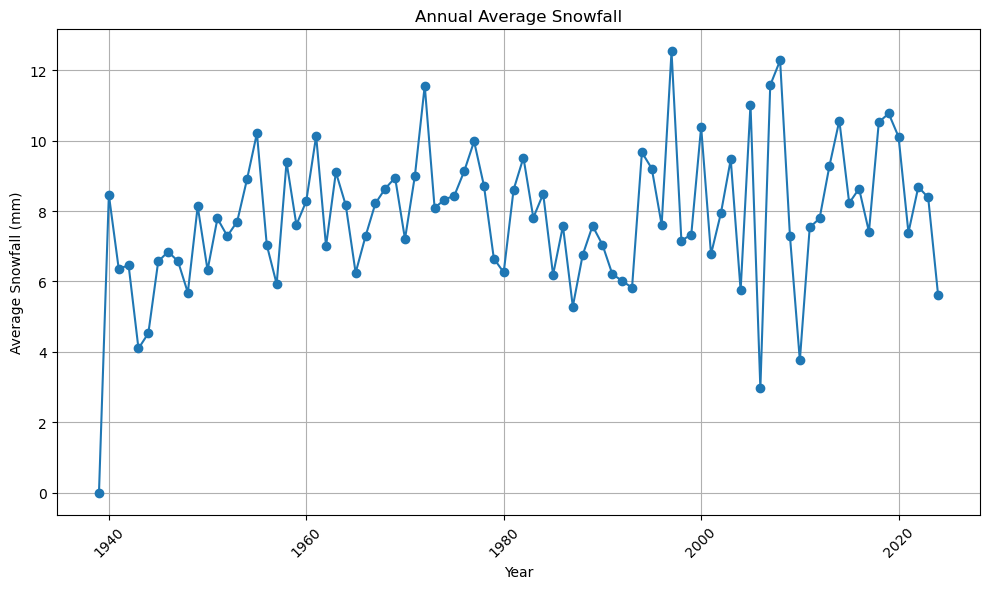

In [59]:
import matplotlib.pyplot as plt#按年份绘制降雪变化
df_filtered['YEAR'] = pd.to_datetime(df_filtered['DATE']).dt.year
annual_avg_snow = df_filtered.groupby('YEAR')['SNOW'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_snow['YEAR'], annual_avg_snow['SNOW'], marker='o', linestyle='-')
plt.title('Annual Average Snowfall')
plt.xlabel('Year')
plt.ylabel('Average Snowfall (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

           STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
15498  USW00014607  1981-08-17  46.87049  -68.01723      188.6   
5661   USW00014607  1954-09-11  46.87049  -68.01723      188.6   
7098   USW00014607  1958-08-18  46.87049  -68.01723      188.6   
11527  USW00014607  1970-10-03  46.87049  -68.01723      188.6   
27155  USW00014607  2013-07-17  46.87049  -68.01723      188.6   
4953   USW00014607  1952-10-03  46.87049  -68.01723      188.6   
14787  USW00014607  1979-09-06  46.87049  -68.01723      188.6   
18853  USW00014607  1990-10-24  46.87049  -68.01723      188.6   
11138  USW00014607  1969-09-09  46.87049  -68.01723      188.6   
28717  USW00014607  2017-10-26  46.87049  -68.01723      188.6   

                                         NAME    PRCP PRCP_ATTRIBUTES  SNOW  \
15498  CARIBOU WEATHER FORECAST OFFICE, ME US  1694.0            ,,0,   0.0   
5661   CARIBOU WEATHER FORECAST OFFICE, ME US  1577.0            ,,0,   0.0   
7098   CARIBOU WEATHER FORECAST OFFI

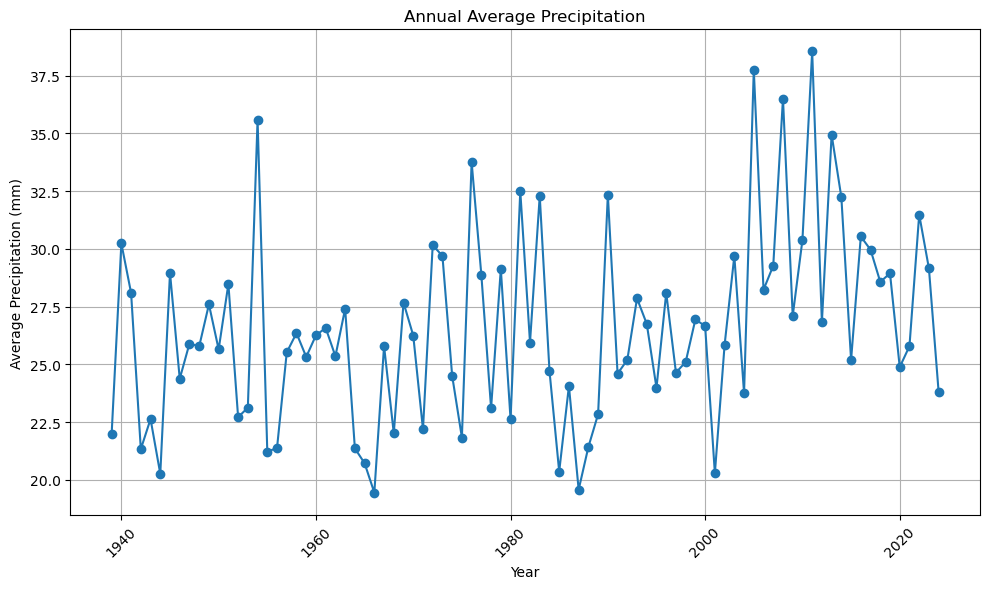

In [61]:
df_filtered = df[pd.notnull(df['PRCP'])]
df_filtered = df_filtered[df_filtered['PRCP'] != '']

# 将PRCP列的值转换为数值类型
df_filtered['PRCP'] = pd.to_numeric(df_filtered['PRCP'], errors='coerce')
df_sorted_rain = df_filtered.sort_values(by='PRCP', ascending=False)

print(df_sorted_rain.head(10))
df_filtered['YEAR'] = pd.to_datetime(df_filtered['DATE']).dt.year

# 按年份分组并计算每年的平均降雨量
annual_avg_prcp = df_filtered.groupby('YEAR')['PRCP'].mean().reset_index()

# 使用matplotlib绘制年份与平均降雨量的变化图
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_prcp['YEAR'], annual_avg_prcp['PRCP'], marker='o', linestyle='-')
plt.title('Annual Average Precipitation')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

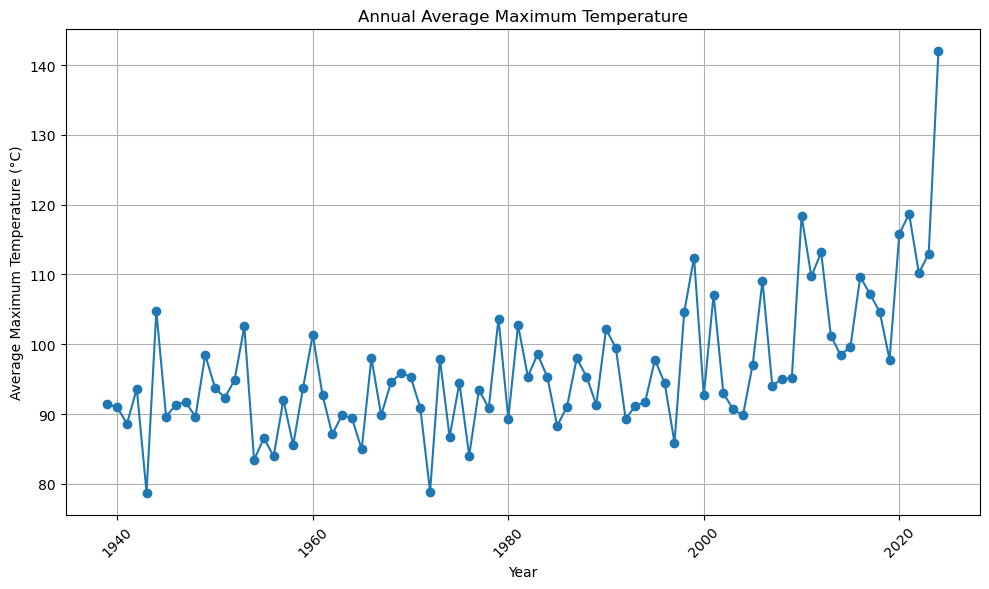

In [63]:
df_filtered = df[pd.notnull(df['TMAX'])]
df_filtered = df_filtered[df_filtered['TMAX'] != '']
df_filtered['TMAX'] = pd.to_numeric(df_filtered['TMAX'], errors='coerce')
df_filtered['YEAR'] = pd.to_datetime(df_filtered['DATE']).dt.year
annual_avg_tmax = df_filtered.groupby('YEAR')['TMAX'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_tmax['YEAR'], annual_avg_tmax['TMAX'], marker='o', linestyle='-')
plt.title('Annual Average Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Average Maximum Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()